In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**STEPS ANALYSIS**

In [ ]:
step_daily = pd.read_csv('/content/dailySteps_merged.csv')
step_hourly = pd.read_csv('/content/hourlySteps_merged.csv')

In [ ]:
step_daily.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [ ]:
step_daily['ActivityDay'] = pd.to_datetime(step_daily['ActivityDay'])
step_daily['Day Of Week'] = step_daily['ActivityDay'].dt.day_name()
step_daily.head()

,Id,ActivityDay,StepTotal,Day Of Week
0,1503960366,2016-04-12,13162,Tuesday
1,1503960366,2016-04-13,10735,Wednesday
2,1503960366,2016-04-14,10460,Thursday
3,1503960366,2016-04-15,9762,Friday
4,1503960366,2016-04-16,12669,Saturday


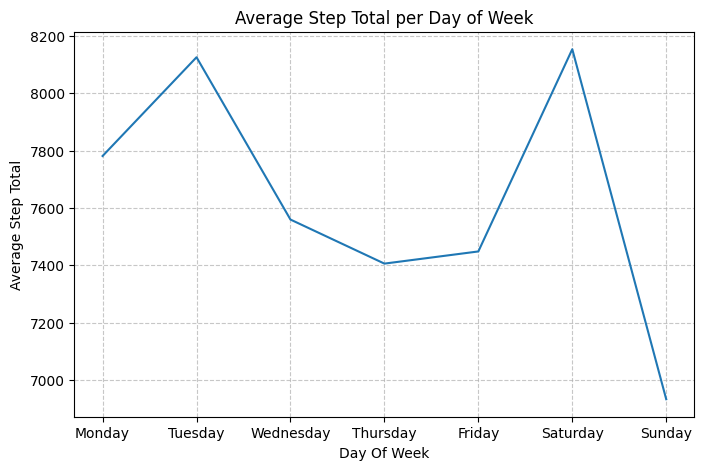

In [ ]:
# Calculating the mean steps for each day of the week and reindex for proper order
daily_steps_avg = step_daily.groupby('Day Of Week')['StepTotal'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(8, 5))
sns.lineplot(x=daily_steps_avg.index, y=daily_steps_avg.values)
plt.title('Average Step Total per Day of Week')
plt.xlabel('Day Of Week')
plt.ylabel('Average Step Total')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(step_daily.groupby('Day Of Week')['StepTotal'].mean())

Day Of Week
Friday       7448.230159
Monday       7780.866667
Saturday     8152.975806
Sunday       6933.231405
Thursday     7405.836735
Tuesday      8125.006579
Wednesday    7559.373333
Name: StepTotal, dtype: float64


In [ ]:
step_hourly.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


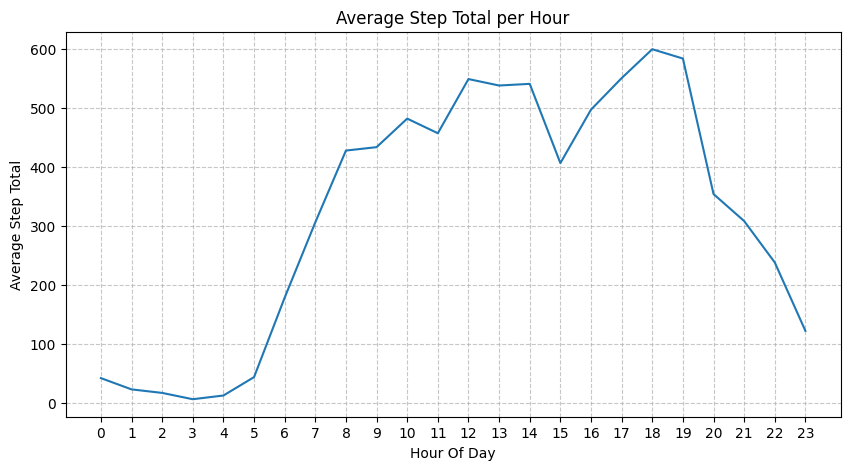

In [ ]:
# Converting 'ActivityHour' to datetime objects, specifying the format to avoid warnings
step_hourly['ActivityHour'] = pd.to_datetime(step_hourly['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
# Extracting the hour from 'ActivityHour'
step_hourly['Hour'] = step_hourly['ActivityHour'].dt.hour

# The mean steps per hour
hourly_steps_avg = step_hourly.groupby('Hour')['StepTotal'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_steps_avg.index, y=hourly_steps_avg.values)
plt.title('Average Step Total per Hour')
plt.xlabel('Hour Of Day')
plt.ylabel('Average Step Total')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(hourly_steps_avg)

Hour
0      42.188437
1      23.102894
2      17.110397
3       6.426581
4      12.699571
5      43.869099
6     178.508056
7     306.049409
8     427.544576
9     433.301826
10    481.665231
11    456.886731
12    548.642082
13    537.698154
14    540.513572
15    406.319126
16    496.845645
17    550.232892
18    599.169978
19    583.390728
20    353.905077
21    308.138122
22    237.987832
23    122.132890
Name: StepTotal, dtype: float64


**DISTANCE ANALYSIS**

In [ ]:
heartrate = pd.read_csv('/content/heartrate_seconds_merged.csv')
calories = pd.read_csv('/content/dailyCalories_merged.csv')
intensities = pd.read_csv('/content/dailyIntensities_merged.csv')

In [ ]:
intensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [ ]:
# Convert 'ActivityDay' to datetime objects if not already done
intensities['ActivityDay'] = pd.to_datetime(intensities['ActivityDay'])

# Calculate total distance for each day
intensities['TotalDistance'] = intensities['LightActiveDistance'] + \
                               intensities['ModeratelyActiveDistance'] + \
                               intensities['VeryActiveDistance']

# Calculate the average total distance per day
average_daily_distance = intensities.groupby('ActivityDay')['TotalDistance'].mean()

print("Average total distance covered per day:")
print(average_daily_distance.mean())

Average total distance covered per day:
5.379538360804003


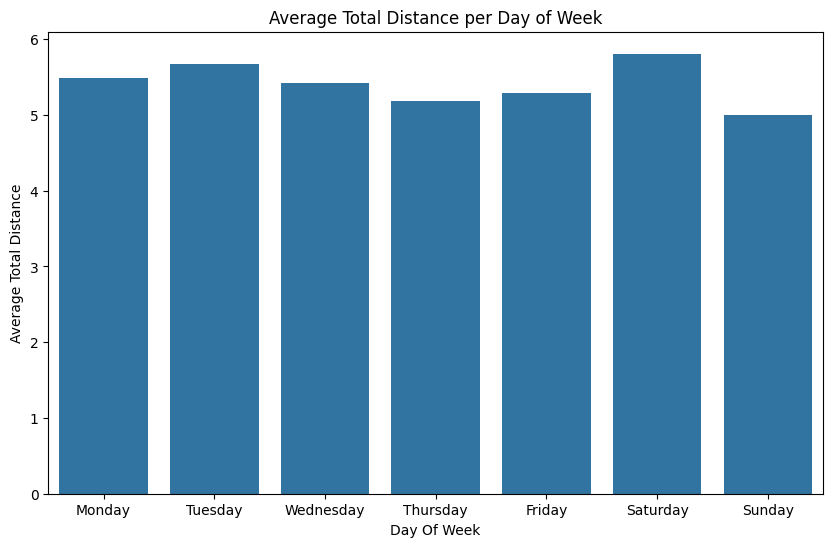

In [ ]:
# Ensure 'ActivityDay' is datetime and extract 'Day Of Week'
intensities['ActivityDay'] = pd.to_datetime(intensities['ActivityDay'])
intensities['Day Of Week'] = intensities['ActivityDay'].dt.day_name()

# Calculate total distance for each day (moved from previous cell to ensure it's available)
intensities['TotalDistance'] = intensities['LightActiveDistance'] + \
                               intensities['ModeratelyActiveDistance'] + \
                               intensities['VeryActiveDistance']

# Calculate the mean total distance for each day of the week and reindex for proper order
daily_distance_avg = intensities.groupby('Day Of Week')['TotalDistance'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_distance_avg.index, y=daily_distance_avg.values)
plt.title('Average Total Distance per Day of Week')
plt.xlabel('Day Of Week')
plt.ylabel('Average Total Distance')
plt.show()

**CALORIES ANALYSIS**

In [ ]:
calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [ ]:
# Convert 'ActivityDay' to datetime objects
calories['ActivityDay'] = pd.to_datetime(calories['ActivityDay'])

# Extract the day of the week
calories['Day Of Week'] = calories['ActivityDay'].dt.day_name()

# Calculate the mean calories burned per day of the week and reindex for proper order
daily_calories_avg = calories.groupby('Day Of Week')['Calories'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print("Average Calories Burned per Day of Week:")
print(daily_calories_avg)
print(daily_calories_avg.mean())

Average Calories Burned per Day of Week:
Day Of Week
Monday       2324.208333
Tuesday      2356.013158
Wednesday    2302.620000
Thursday     2199.571429
Friday       2331.785714
Saturday     2354.967742
Sunday       2263.000000
Name: Calories, dtype: float64
2304.595196574385


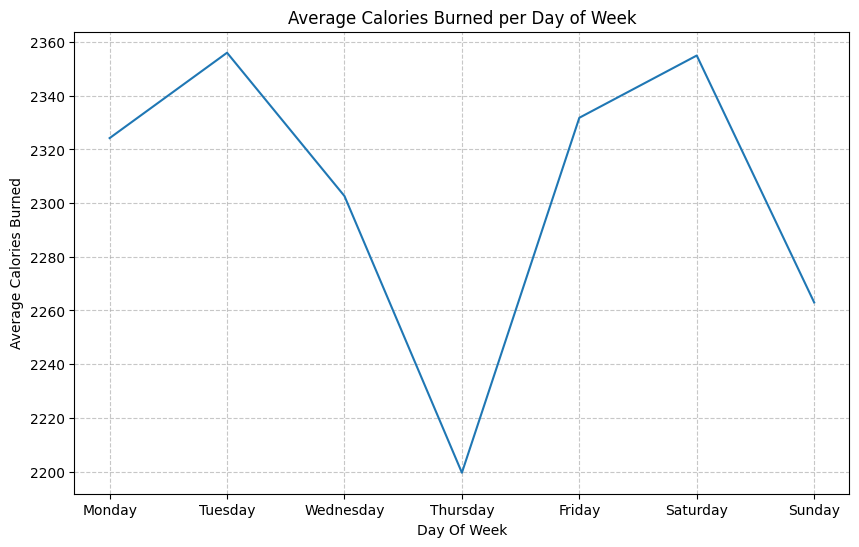

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_calories_avg.index, y=daily_calories_avg.values)
plt.title('Average Calories Burned per Day of Week')
plt.xlabel('Day Of Week')
plt.ylabel('Average Calories Burned')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
hourly_calories = pd.read_csv('/content/hourlyCalories_merged.csv')
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


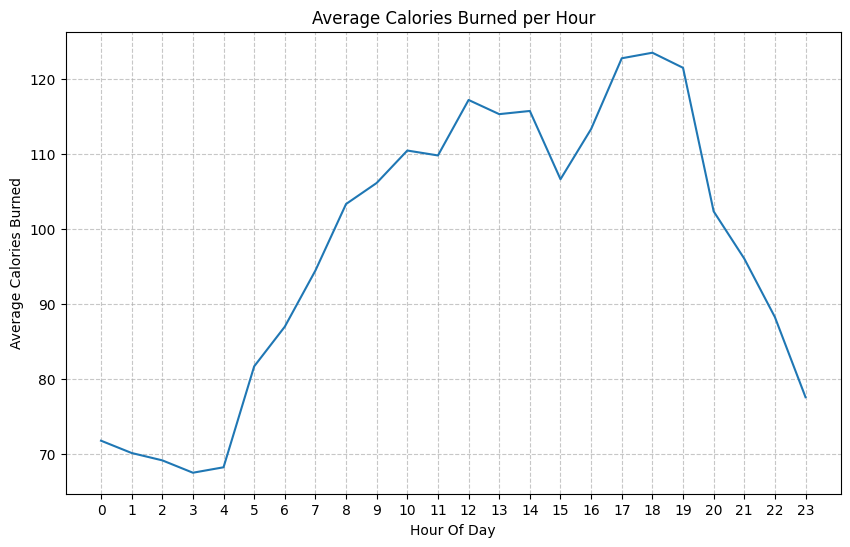

In [ ]:
# Convert 'ActivityHour' to datetime objects, specifying the format
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the hour from 'ActivityHour'
hourly_calories['Hour'] = hourly_calories['ActivityHour'].dt.hour

# Calculate the mean calories burned per hour
hourly_calories_avg = hourly_calories.groupby('Hour')['Calories'].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_calories_avg.index, y=hourly_calories_avg.values)
plt.title('Average Calories Burned per Hour')
plt.xlabel('Hour Of Day')
plt.ylabel('Average Calories Burned')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**PHYSICAL ACTIVITY**

In [ ]:
hourly_intensities = pd.read_csv('/content/hourlyIntensities_merged.csv')
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_intensities['Hour'] = hourly_intensities['ActivityHour'].dt.hour
hourly_intensities['TotalActiveMinutes'] = hourly_intensities['TotalIntensity']
hourly_active_minutes_avg = hourly_intensities.groupby('Hour')['TotalActiveMinutes'].mean()

print("Hourly Intensities (first 5 rows):")
print(hourly_intensities.head())
print("\nAverage Total Active Minutes per Hour:")
print(hourly_active_minutes_avg.head())

Hourly Intensities (first 5 rows):
           Id        ActivityHour  TotalIntensity  AverageIntensity  Hour  \
0  1503960366 2016-04-12 00:00:00              20          0.333333     0   
1  1503960366 2016-04-12 01:00:00               8          0.133333     1   
2  1503960366 2016-04-12 02:00:00               7          0.116667     2   
3  1503960366 2016-04-12 03:00:00               0          0.000000     3   
4  1503960366 2016-04-12 04:00:00               0          0.000000     4   

   TotalActiveMinutes  
0                  20  
1                   8  
2                   7  
3                   0  
4                   0  

Average Total Active Minutes per Hour:
Hour
0    2.129550
1    1.419078
2    1.043944
3    0.443730
4    0.633047
Name: TotalActiveMinutes, dtype: float64


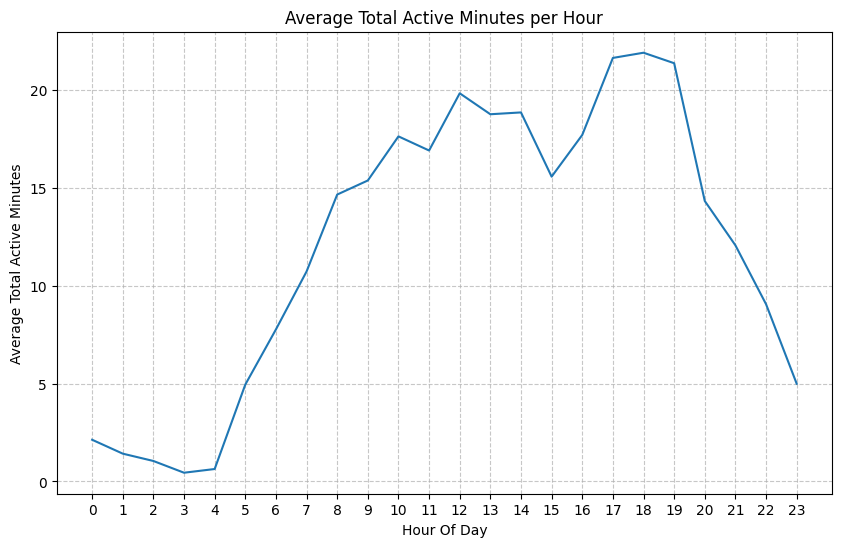

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_active_minutes_avg.index, y=hourly_active_minutes_avg.values)
plt.title('Average Total Active Minutes per Hour')
plt.xlabel('Hour Of Day')
plt.ylabel('Average Total Active Minutes')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
daily_intensity_avg = intensities.groupby('Day Of Week')[['LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryMinutes']].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Convert minutes to hours
daily_intensity_avg[['LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryMinutes']] = daily_intensity_avg[['LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryMinutes']] / 60

print("Average Daily Intensity Levels per Day of Week (in hours):")
print(daily_intensity_avg)

overall_avg_intensity = daily_intensity_avg[['LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryMinutes']].mean()
print("\nOverall Average Activity Levels (in hours):")
print(overall_avg_intensity)

Average Daily Intensity Levels per Day of Week (in hours):
             LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  \
Day Of Week                                                                 
Monday                   3.200972             0.233333           0.385139   
Tuesday                  3.289035             0.238925           0.382566   
Wednesday                3.164222             0.218333           0.346333   
Thursday                 3.090363             0.199320           0.323469   
Friday                   3.403307             0.201852           0.334259   
Saturday                 3.452419             0.253360           0.365323   
Sunday                   2.899587             0.242149           0.333058   

             SedentaryMinutes  
Day Of Week                    
Monday              17.132361  
Tuesday             16.789364  
Wednesday           16.491333  
Thursday            16.033220  
Friday              16.671825  
Saturday            16.

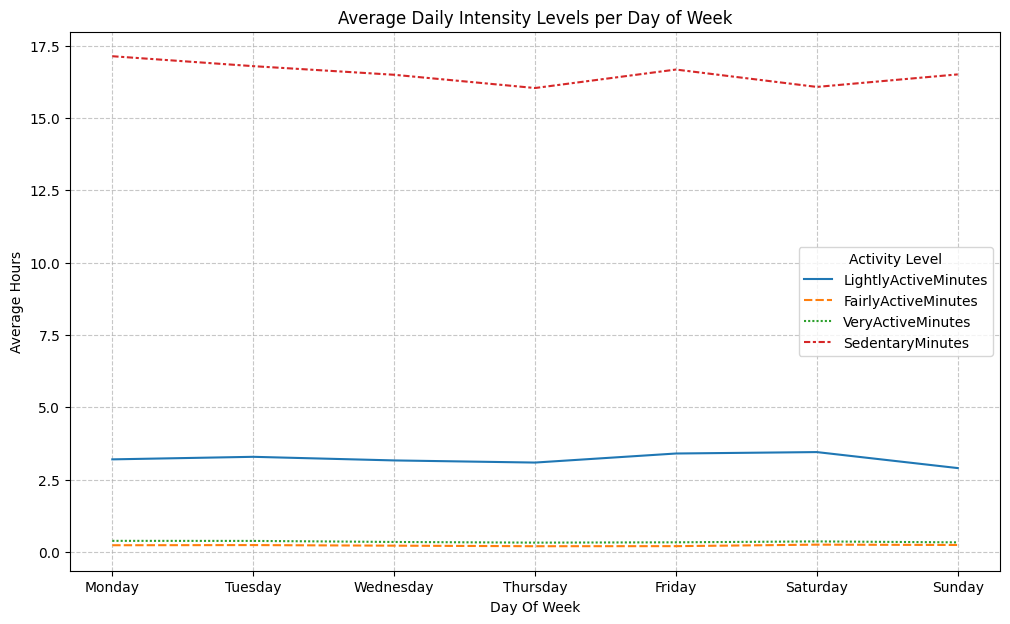

In [ ]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=daily_intensity_avg)
plt.title('Average Daily Intensity Levels per Day of Week')
plt.xlabel('Day Of Week')
plt.ylabel('Average Hours')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Activity Level')
plt.show()

**HEART RATE ANALYSIS**

In [ ]:
heartrate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97.0
1,2022484408,4/12/2016 7:21:05 AM,102.0
2,2022484408,4/12/2016 7:21:10 AM,105.0
3,2022484408,4/12/2016 7:21:20 AM,103.0
4,2022484408,4/12/2016 7:21:25 AM,101.0


In [ ]:
heartrate['Time'] = pd.to_datetime(heartrate['Time'], format='mixed', dayfirst=False)
heartrate['Date'] = heartrate['Time'].dt.date
daily_avg_heartrate = heartrate.groupby(['Id', 'Date'])['Value'].mean().reset_index()
daily_avg_heartrate['Day Of Week'] = pd.to_datetime(daily_avg_heartrate['Date']).dt.day_name()

print("First 5 rows of daily_avg_heartrate:")
print(daily_avg_heartrate.head())

First 5 rows of daily_avg_heartrate:
           Id        Date      Value Day Of Week
0  2022484408  2016-04-12  75.804177     Tuesday
1  2022484408  2016-04-13  80.337584   Wednesday
2  2022484408  2016-04-14  72.628597    Thursday
3  2022484408  2016-04-15  80.437382      Friday
4  2022484408  2016-04-16  75.960547    Saturday


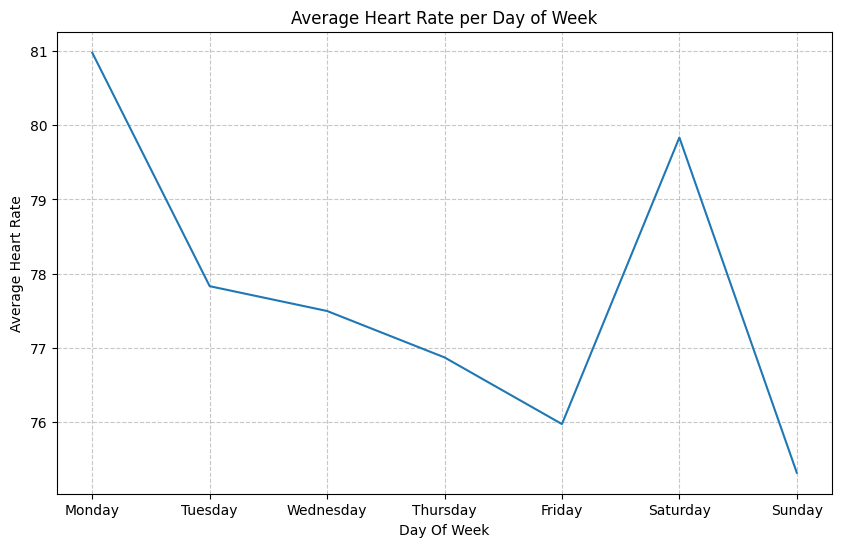

Average Heart Rate per Day of Week:
Day Of Week
Monday       80.976354
Tuesday      77.830606
Wednesday    77.496128
Thursday     76.870735
Friday       75.972639
Saturday     79.833692
Sunday       75.317111
Name: Value, dtype: float64


In [ ]:
daily_avg_heartrate_per_weekday = daily_avg_heartrate.groupby('Day Of Week')['Value'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_avg_heartrate_per_weekday.index, y=daily_avg_heartrate_per_weekday.values)
plt.title('Average Heart Rate per Day of Week')
plt.xlabel('Day Of Week')
plt.ylabel('Average Heart Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Average Heart Rate per Day of Week:")
print(daily_avg_heartrate_per_weekday)

**SLEEP ANALYSIS**

In [ ]:
sleep_day = pd.read_csv('/content/sleepDay_merged.csv')
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


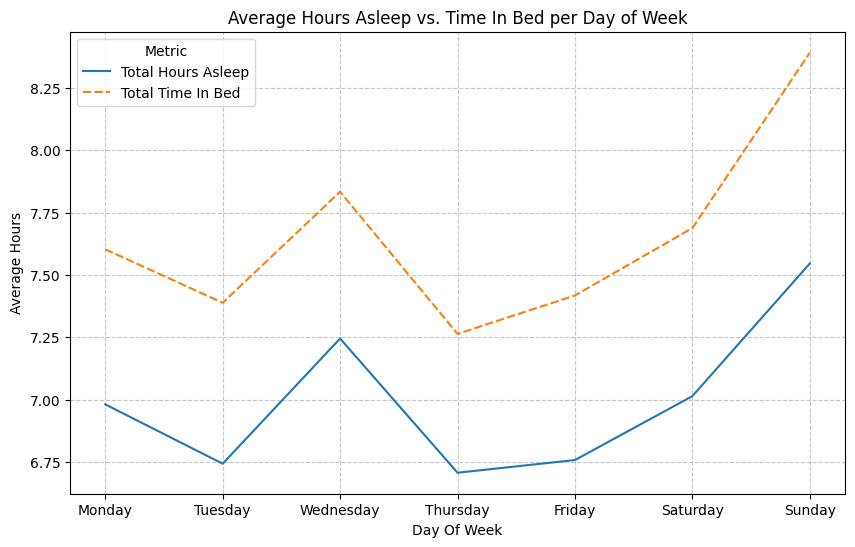

Average Hours Asleep and Time In Bed per Day of Week:
             Total Hours Asleep  Total Time In Bed
Day Of Week                                       
Monday                 6.980496           7.602837
Tuesday                6.742308           7.388205
Wednesday              7.244697           7.833838
Thursday               6.706154           7.263333
Friday                 6.757018           7.417544
Saturday               7.013506           7.687931
Sunday                 7.545758           8.391818


In [ ]:
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
sleep_day['Day Of Week'] = sleep_day['SleepDay'].dt.day_name()

daily_sleep_avg = sleep_day.groupby('Day Of Week')[['TotalMinutesAsleep', 'TotalTimeInBed']].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Convert minutes to hours
daily_sleep_avg[['TotalMinutesAsleep', 'TotalTimeInBed']] = daily_sleep_avg[['TotalMinutesAsleep', 'TotalTimeInBed']] / 60

# Rename columns for better legend labels
daily_sleep_avg = daily_sleep_avg.rename(columns={
    'TotalMinutesAsleep': 'Total Hours Asleep',
    'TotalTimeInBed': 'Total Time In Bed'
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_sleep_avg)
plt.title('Average Hours Asleep vs. Time In Bed per Day of Week')
plt.xlabel('Day Of Week')
plt.ylabel('Average Hours')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Metric')
plt.show()

print("Average Hours Asleep and Time In Bed per Day of Week:")
print(daily_sleep_avg)


**Weight Analysis**

In [ ]:
weight = pd.read_csv('/content/weightLogInfo_merged.csv')
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


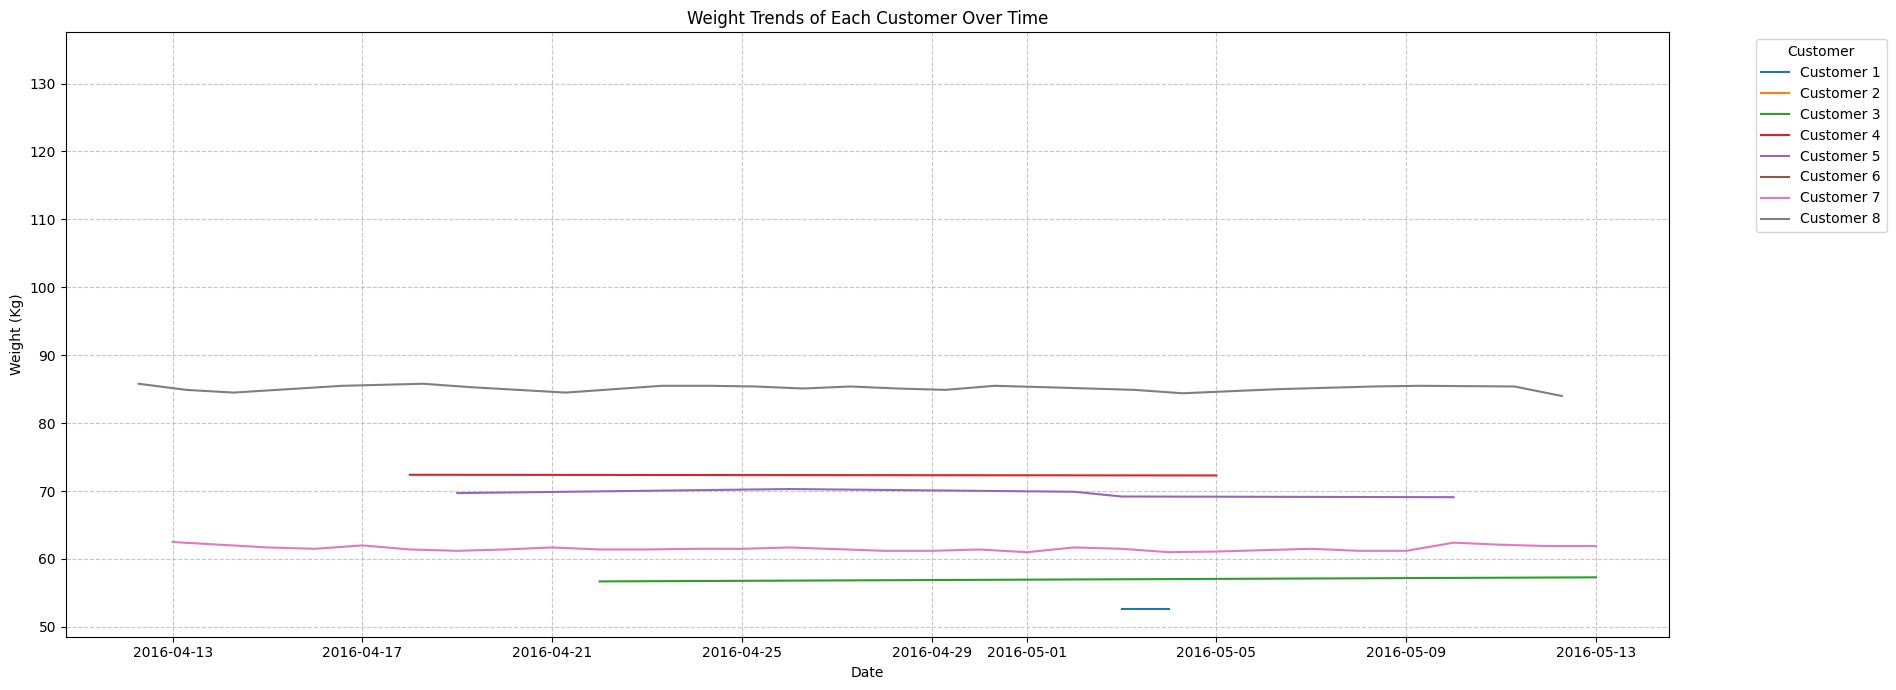

First 5 rows of weight data with converted Date and Customer Labels:
           Id                Date    WeightKg  WeightPounds   Fat        BMI  \
0  1503960366 2016-05-02 23:59:59   52.599998    115.963147  22.0  22.650000   
1  1503960366 2016-05-03 23:59:59   52.599998    115.963147   NaN  22.650000   
2  1927972279 2016-04-13 01:08:52  133.500000    294.317120   NaN  47.540001   
3  2873212765 2016-04-21 23:59:59   56.700001    125.002104   NaN  21.450001   
4  2873212765 2016-05-12 23:59:59   57.299999    126.324875   NaN  21.690001   

   IsManualReport          LogId Customer_Label  
0            True  1462233599000     Customer 1  
1            True  1462319999000     Customer 1  
2           False  1460509732000     Customer 2  
3            True  1461283199000     Customer 3  
4            True  1463097599000     Customer 3  


In [ ]:
weight['Date'] = pd.to_datetime(weight['Date'], format='mixed', dayfirst=False)

# Create a mapping from original 'Id' to 'Customer X'
unique_ids = weight['Id'].unique()
id_to_customer = {id_val: f'Customer {i+1}' for i, id_val in enumerate(unique_ids)}
weight['Customer_Label'] = weight['Id'].map(id_to_customer)

plt.figure(figsize=(19, 7))
sns.lineplot(data=weight, x='Date', y='WeightKg', hue='Customer_Label', palette='tab10')
plt.title('Weight Trends of Each Customer Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (Kg)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("First 5 rows of weight data with converted Date and Customer Labels:")
print(weight.head())